«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо  сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

**Общий план проекта**

Шаг 1. Подготовить данные
- Привести данные к нужным типам;
- Найти и исправить ошибки в данных, если они есть.

Посчитать для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Шаг 2. Проанализировать данные
Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы, описать распределения.

Шаг 3. Проверить гипотезы
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.


**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

## Изучение данных из файла

Сначала извлечем данные и посмотрим общие параметры.

In [1]:
#импортируем библиотеки
import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt

from scipy import stats as st
import numpy as np



calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

#циклом выведем базовую инфу по таблицам
tabs = [calls, internet, messages, tariffs, users]
for tab in tabs:
    tab.info()
    display(tab.head())
    print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Далее пойдем по порядку, начав со Звонков

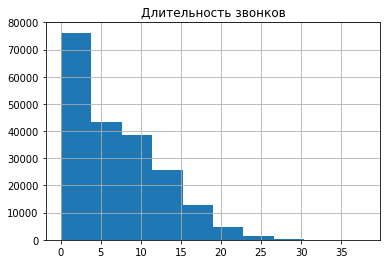

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [2]:
plt.title('Длительность звонков')
calls['duration'].hist()
plt.show()
calls['duration'].describe()

В соответствии с условиями нужно будет **округлить** продолжительность звонка в большую сторону, а также перевести тип данных в столбще Дата звонка в дату. Нули здесь видимо означают неуспешные звонки, их трогать не будем.

Теперь смотрим Интернет.

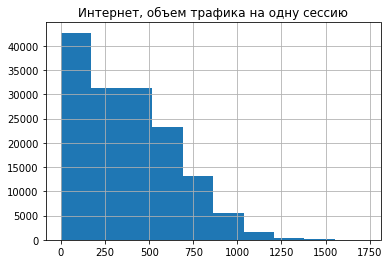

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [3]:
plt.title('Интернет, объем трафика на одну сессию')
internet['mb_used'].hist()
plt.show()
internet['mb_used'].describe()

Здесь видим, что в среднем сессия занимает 350мб, но потом надо объединить данные с группировкой по пользователям, т.к. здесь общее число сессий. 
И надо также перевести в Дату столбец Дата сессии и округлить месячный объем мегабайт до гигабайт при группировке.

Еще вопрос вызывает наличие строк с 0ми в мегабайтах, посмотрим на них отдельно.

In [4]:
#сразу на будущее промаркируем строчки в отдельный датафрейм
zero_mb = internet.query('mb_used == 0').index

internet.query('mb_used == 0')

,Unnamed: 0,id,mb_used,session_date,user_id
11,11,1000_11,0.0,2018-08-28,1000
38,38,1000_38,0.0,2018-11-27,1000
46,46,1000_46,0.0,2018-06-30,1000
67,67,1000_67,0.0,2018-06-16,1000
72,72,1000_72,0.0,2018-06-15,1000
...,...,...,...,...,...
149380,149380,1499_141,0.0,2018-12-11,1499
149381,149381,1499_142,0.0,2018-11-01,1499
149383,149383,1499_144,0.0,2018-11-27,1499
149386,149386,1499_147,0.0,2018-10-21,1499


Почти 20 тысяч строк из 149 несут баранки в нашу таблицу, искажая все параметры. Это скорее всего ничтожно маленький трафик, например пуши, которые весят меньше 10кб, но машина все равно зафиксировала его в статистику с 0.
В любом случае эти строки не повлияют на вычисление объема трафика на одного пользователя, поэтому их можно **удалить**.

Далее смс.

'СМС на пользователя'

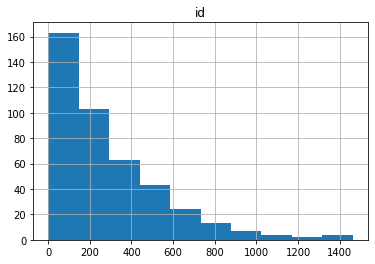

count     426.000000
mean      288.816901
std       267.607552
min         1.000000
25%        85.750000
50%       215.500000
75%       414.000000
max      1463.000000
Name: id, dtype: float64

In [5]:
display('СМС на пользователя')
messages.pivot_table(index='user_id', values='id', aggfunc='count').hist()
plt.show()
messages.pivot_table(index='user_id', values='id', aggfunc='count')['id'].describe()

В среднем по 288 смс на пользователя. Кстати 74 человека вообще ни разу не отправляли смс.

Переведем также столбец Дата смс в корректный тип.

Далее таблица с пользователями.

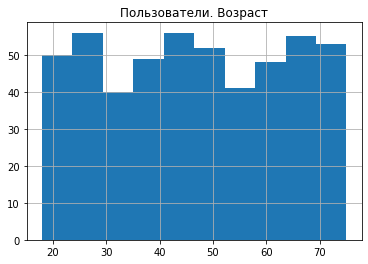

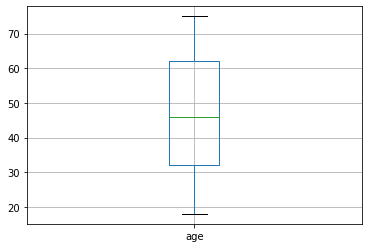

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

'Города:'

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Нижневартовск       1
Подольск            1
Иваново             1
Архангельск         1
Химки               1
Name: city, Length: 76, dtype: int64

'Значения в столбце Дата прекращения пользования тарифом:'

array([nan, '2018-10-05', '2018-12-18', '2018-11-21', '2018-10-03',
       '2018-10-14', '2018-12-09', '2018-12-11', '2018-12-26',
       '2018-08-31', '2018-12-03', '2018-12-23', '2018-11-07',
       '2018-12-16', '2018-12-20', '2018-11-30', '2018-12-21',
       '2018-08-17', '2018-09-02', '2018-10-04', '2018-11-13',
       '2018-11-22', '2018-10-28', '2018-11-26', '2018-11-27',
       '2018-11-16', '2018-10-27', '2018-12-30', '2018-09-27',
       '2018-12-25', '2018-12-14', '2018-12-24', '2018-09-26',
       '2018-10-25'], dtype=object)

'Из них отсутсвует: '

462

In [6]:
plt.title('Пользователи. Возраст')
users['age'].hist()
plt.show()

users.boxplot(column='age')
plt.show()

display(users['age'].describe())

display('Города:')
display(users['city'].value_counts())

display('Значения в столбце Дата прекращения пользования тарифом:')
display(users['churn_date'].unique())
display('Из них отсутсвует: ', users['churn_date'].isna().sum())

Наблюдаем практически идеальную выборку по возрасту: здесь равномерно присутствуют практически все возраста от 18 до 75. 

Также география пользователей - практически вся Россия, всего 76 населенных пункотов, большинство из Москвы и Санкт-Петербурга. Но для проекта нам потребуется исслодовать Москву и остальных, поэтому заменим их на 2 большие группы: **Москва и Регионы**.

Что касается прекращения пользования тарифом, то на момент выборки уже 500-462=38 пользователей перестали сидеть на исследуемых тарифах - это тоже надо взять на заметку.

И надо тоже поменять тип данных в столбцах дат.

Итого, что надо поправить: 
- изменить тип данных в столбцах с датами во всех таблицах
- удалить строки с 0ми в таблице traffic
- присвоить пользователям группы Москва либо Регионы
- в каждую таблицу добавить столбец с месяцем для последующей помесячной группировки
- сгруппировать в таблицах данные по user_id для последующего анализа
- округлить количество минут и мегабайт трафика при группировке

## Предобработка данных

Начнем с дат.

In [7]:
#dates = [calls['call_date'], internet['session_date'], messages['message_date'], users['churn_date'], users['reg_date']]
#for date in dates:
    #pd.to_datetime(date, format='%Y-%m-%dT%H:%M:%S')
    #это цикл, который не сработал: в dates сидят копии датафреймов, и из-за этого он не менял в исходниках данные
    

calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
    

In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Сейчас удалим нули в трафике.

In [9]:
internet = internet.query('mb_used > 0')
internet = internet.reset_index()
display(internet.head())
internet.info()

,index,Unnamed: 0,id,mb_used,session_date,user_id
0,0,0,1000_0,112.95,2018-11-25,1000
1,1,1,1000_1,1052.81,2018-09-07,1000
2,2,2,1000_2,1197.26,2018-06-25,1000
3,3,3,1000_3,550.27,2018-08-22,1000
4,4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129798 entries, 0 to 129797
Data columns (total 6 columns):
index           129798 non-null int64
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.9+ MB


Теперь города: менять их в исходнике не будем, а создадим в таблице users столбец с группой: Москву пометим 1, остальные города 0.

In [10]:
def city_type(row_values):
    if row_values['city'] == 'Москва': return 1
    return 0

users['city_type'] = users.apply(city_type, axis = 1)
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,city_type
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,1
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,1
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,0


Добавим месяц в таблицы.

In [11]:
calls['month'] = calls['call_date'].dt.month
internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month

Прежде, чем делать группировку, округлим длительность звонков в большую сторону до минуты.

In [12]:
#округлим методом np.ceil в большую сторону
calls['duration'] = np.ceil(calls['duration'])
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


Теперь сделаем таблицы с группировкой по пользователям.

In [13]:
#для звонков
calls_grouped = calls.groupby(['user_id','month'], as_index=False).agg({'duration': ['count','sum']})
calls_grouped.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
display(calls_grouped.head(10))

#для интернета
internet_grouped = internet.groupby(['user_id','month'], as_index=False).agg({'mb_used':'sum'})
display(internet_grouped.head(10))

#для смс
messages_grouped = messages.groupby(['user_id','month'], as_index=False).agg({'message_date':'count'})
messages_grouped.columns = ['user_id', 'month', 'messages']
display(messages_grouped.head(10))

,user_id,month,calls_count,calls_sum
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
5,1000,10,57,350.0
6,1000,11,43,338.0
7,1000,12,46,333.0
8,1001,11,59,430.0
9,1001,12,63,414.0


,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
5,1000,10,14702.49
6,1000,11,14756.47
7,1000,12,9817.61
8,1001,11,18429.34
9,1001,12,14036.66


,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


Теперь округлим мегабайты в гигабайты в соответствии с правилами оператора.

In [14]:
#переводим в гигабайты
internet_grouped['mb_used'] = internet_grouped['mb_used']/1024

#также переводим в гигабайты и в таблице Tariffs
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs.rename(columns={'mb_per_month_included':'gb_per_month_included'}, inplace = True)

#округляем
internet_grouped['mb_used'] = np.ceil(internet_grouped['mb_used'])
internet_grouped.columns = ['user_id', 'month', 'gb_used']
internet_grouped.head()

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


Остался последний шаг: склеим все данные в одну таблицу, где будет вся помесячная статистика для каждого пользователя.

In [15]:
user_data = calls_grouped.merge(internet_grouped, on=['user_id','month'], how='outer')
user_data = user_data.merge(messages_grouped, on=['user_id','month'], how='outer')
user_data = user_data.merge(users, on=['user_id'], how='left')

#приведем название столбца с тарифами к одному виду, чтобы успешно соединить таблицы
tariffs.rename(columns={'tariff_name':'tariff'}, inplace = True)
user_data = user_data.merge(tariffs, on=['tariff'], how='left')

#опция чтобы увидеть все столбцы
pd.options.display.max_columns = None

user_data.info()
user_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 21 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
calls_count              3174 non-null float64
calls_sum                3174 non-null float64
gb_used                  3201 non-null float64
messages                 2717 non-null float64
age                      3214 non-null int64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
city_type                3214 non-null int64
messages_included        3214 non-null int64
gb_per_month_included    3214 non-null float64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per

,user_id,month,calls_count,calls_sum,gb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,city_type,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,3.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1
1,1000,6,43.0,172.0,23.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1
2,1000,7,47.0,340.0,14.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1
3,1000,8,52.0,408.0,14.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1
4,1000,9,58.0,466.0,15.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1


Теперь посчитаем выручку с пользователя. 

In [16]:
def min_over(row_values):
    result = (row_values['calls_sum'] - row_values['minutes_included']) * row_values['rub_per_minute']
    if result >0: return result
    return 0

def gb_over(row_values):
    result = (row_values['gb_used'] - row_values['gb_per_month_included']) * row_values['rub_per_gb']
    if result >0: return result
    return 0

def sms_over(row_values):
    result = (row_values['messages'] - row_values['messages_included']) * row_values['rub_per_message']
    if result >0: return result
    return 0

user_data['min_over'] = user_data.apply(min_over, axis = 1)
user_data['gb_over'] = user_data.apply(gb_over, axis = 1)
user_data['sms_over'] = user_data.apply(sms_over, axis = 1)

user_data['monthly_cash'] = user_data['rub_monthly_fee'] + user_data['min_over'] + user_data['gb_over'] + user_data['sms_over']
user_data.head()

,user_id,month,calls_count,calls_sum,gb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,city_type,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,min_over,gb_over,sms_over,monthly_cash
0,1000,5,22.0,159.0,3.0,22.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
1,1000,6,43.0,172.0,23.0,60.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
2,1000,7,47.0,340.0,14.0,75.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
3,1000,8,52.0,408.0,14.0,81.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0
4,1000,9,58.0,466.0,15.0,57.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,1950.0


И выделим в отдельную таблицу, добавив столбцы с тарифом и регионом:

In [17]:
user_rev = user_data.pivot_table(index=['user_id', 'month', 'tariff', 'city_type'], values = 'monthly_cash', aggfunc='sum').reset_index()
user_rev

,user_id,month,tariff,city_type,monthly_cash
0,1000,5,ultra,0,1950.0
1,1000,6,ultra,0,1950.0
2,1000,7,ultra,0,1950.0
3,1000,8,ultra,0,1950.0
4,1000,9,ultra,0,1950.0
...,...,...,...,...,...
3209,1498,10,smart,0,1750.0
3210,1499,9,smart,0,550.0
3211,1499,10,smart,0,1150.0
3212,1499,11,smart,0,1513.0


## Расчёты и анализ результатов

Опишем тариф Ultra.

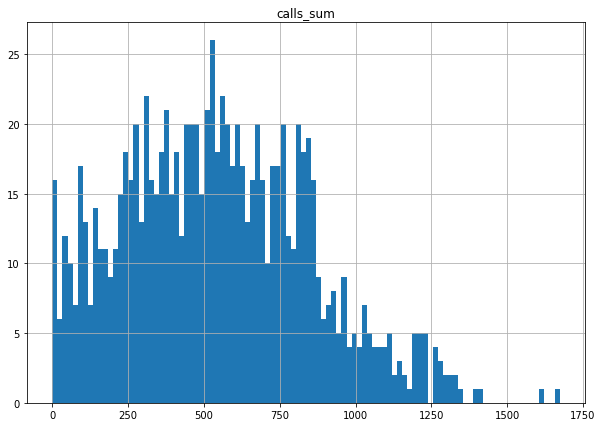

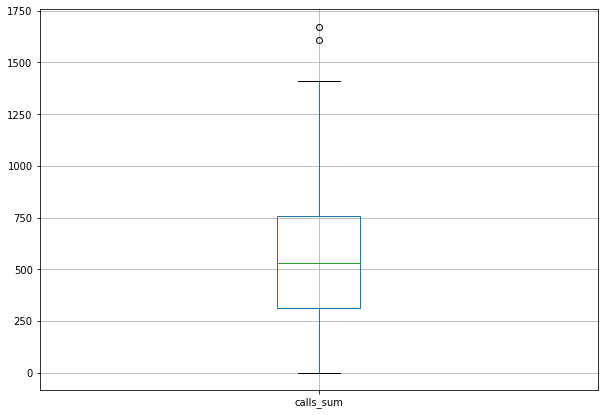

count     951.000000
mean      545.451104
std       306.925754
min         0.000000
25%       310.000000
50%       528.000000
75%       756.500000
max      1673.000000
Name: calls_sum, dtype: float64

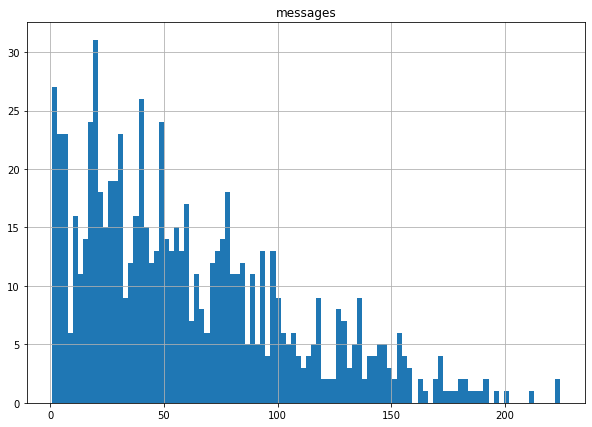

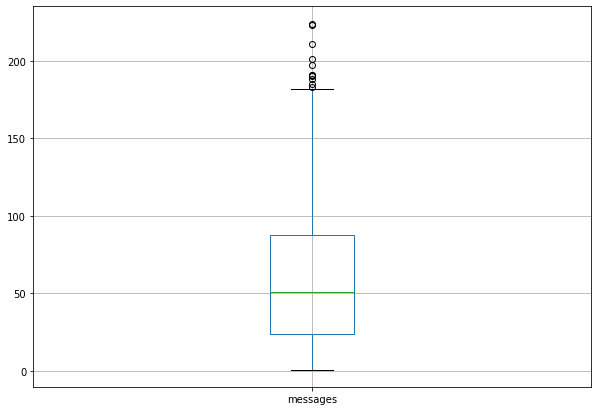

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages, dtype: float64

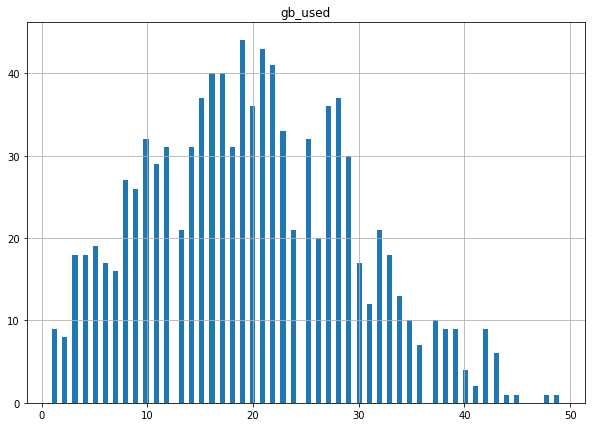

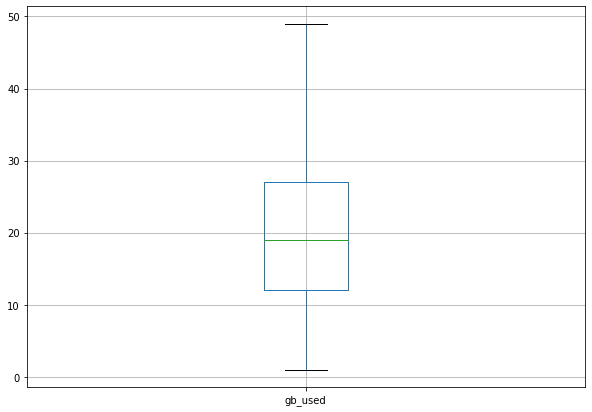

count    974.000000
mean      19.714579
std        9.687335
min        1.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

In [18]:
ultra = user_data.query('tariff == "ultra"')

cols = ['calls_sum', 'messages', 'gb_used']
for col in cols:
    plt.figure(figsize=(10,7))
    plt.title(col)
    ultra[col].hist(bins = 100)
    plt.show()
    plt.figure(figsize=(10,7))
    ultra.boxplot(column=col)
    plt.show()
    display(ultra[col].describe())


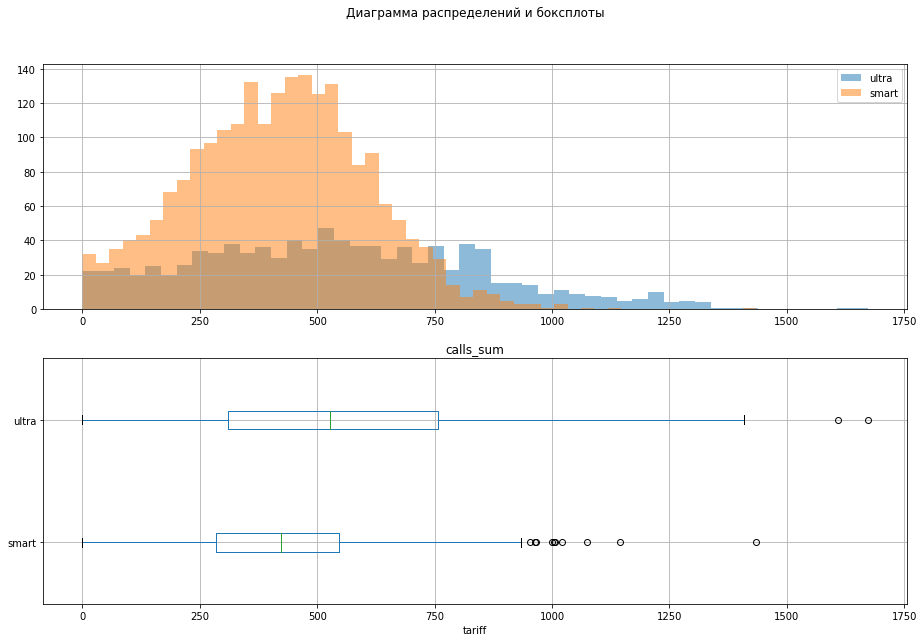

In [19]:
def plot_hist_boxplot(df, group_col, column, title = 'Диаграмма распределений и боксплоты', bins = [50, 50]):
    
    np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
    
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    
    for item in df[group_col].unique():
        axes[0].hist(df.loc[df[group_col] == item, column], bins = bins[0], label = item, alpha = 0.5)
    axes[0].legend()
    axes[0].grid()
    
    df.boxplot(column, by=group_col, ax = axes[1], vert = False)
    fig.suptitle(title)
    
    plt.show()
    
plot_hist_boxplot(user_data, 'tariff', 'calls_sum')

Медианные значения для пользователей Ультра:
- звонки 756 минут. Все пользователи уложились в лимит 3000 минут, значит его более чем достаточно.
- смс 51 шт. График смещен влево - значит что большинство пользователей уменьшает использование смс, тем более 1000 смс в месяц слишком много, самое большое значение было 224 шт за месяц.
- интернет 19 ГБ. Более чем в 75% случаев пользователи уложились в лимит 30ГБ, значит, что он в целом адекватен.

Посчитаем дисперсию и стандартное отклонение для этих значений. 
Исходные данные будем считать выборкой, а не генеральной совокупностью, т.к. у федерального оператора сотовой связи явно в разы больше пользователей, чем 500 человек. Поэтому будем приминять соответствующий коэффициент в расчетах.

In [20]:
print('ДЛЯ ULTRA:')
print(' ')
for col in cols:
    print('Дисперсия для', col, np.var(ultra[col], ddof=1))
    print('Стандартное отклонение для ', col, ':', np.std(ultra[col], ddof=1))
    print('')
    

ДЛЯ ULTRA:
 
Дисперсия для calls_sum 94203.41839614812
Стандартное отклонение для  calls_sum : 306.92575388218586

Дисперсия для messages 2109.6591828651995
Стандартное отклонение для  messages : 45.93102636416042

Дисперсия для gb_used 93.84445321419604
Стандартное отклонение для  gb_used : 9.687334680612414



Теперь возьмемся за второй тариф Smart.

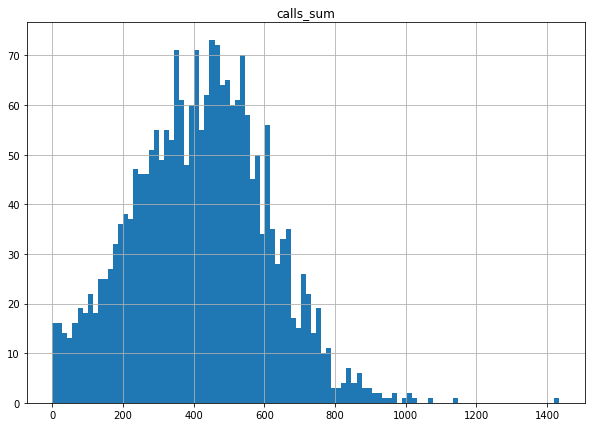

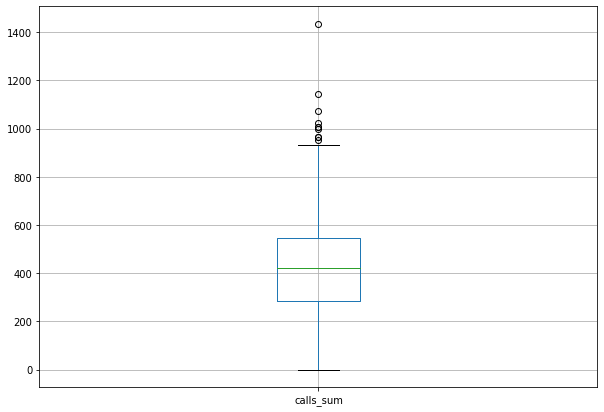

count    2223.000000
mean      419.062978
std       189.325618
min         0.000000
25%       285.000000
50%       423.000000
75%       545.500000
max      1435.000000
Name: calls_sum, dtype: float64

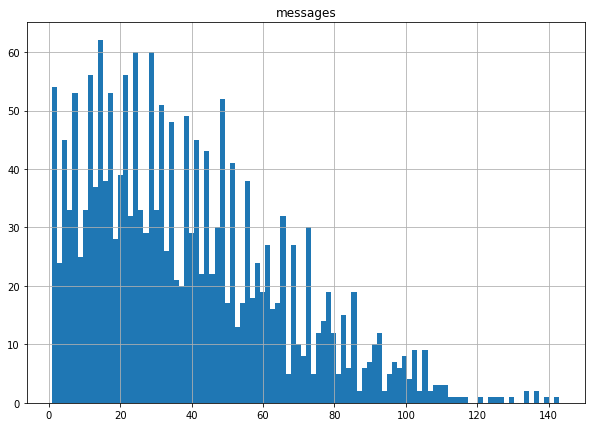

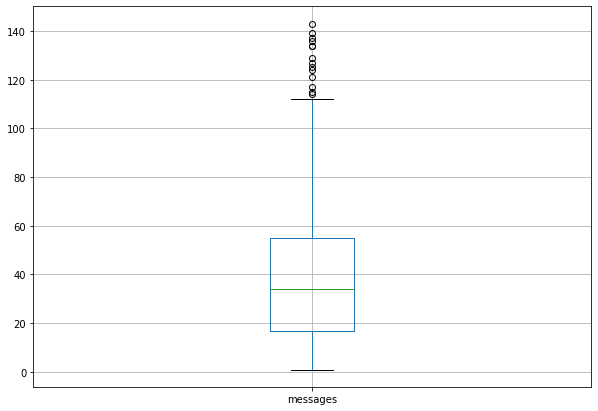

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages, dtype: float64

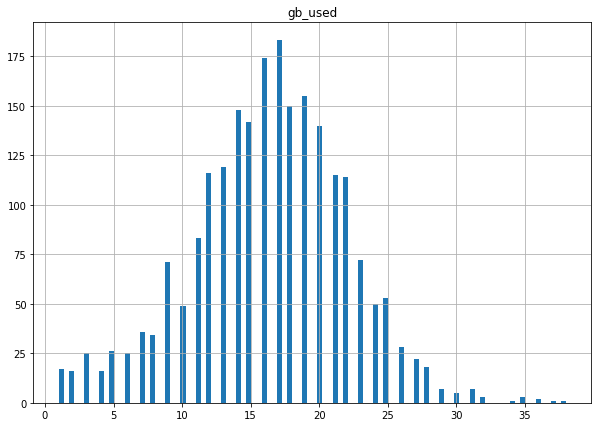

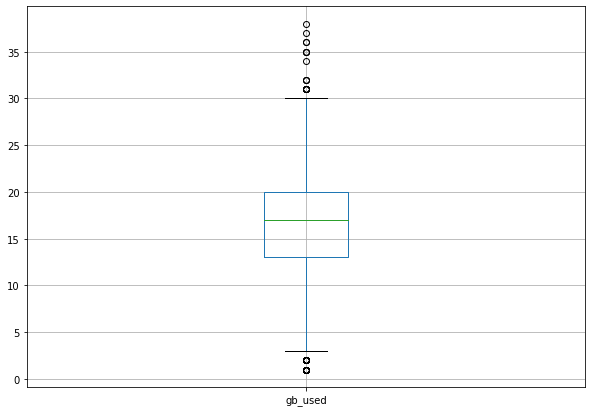

count    2227.000000
mean       16.343511
std         5.728752
min         1.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

In [21]:
smart = user_data.query('tariff == "smart"')

for col in cols:
    plt.figure(figsize=(10,7))
    plt.title(col)
    smart[col].hist(bins = 100)
    plt.show()
    plt.figure(figsize=(10,7))
    smart.boxplot(column=col)
    plt.show()
    display(smart[col].describe())



Медианные значения для пользователей Смарт:
- звонки 423 минуты. Можно отметить, что практически в 75% случаев пользователи укладываются в лимит 500 минут, то есть его в целом хватает.
- смс 34 шт (график также смещен влево, как и у первого тарифа). Также в 3/4 от выборки пользователи уложились в лимит.
- интернет 17 ГБ. А вот трафика пользователям явно не хватает: более чем в половине случаев юзеры превышают лимит гигабайт и, соответсвенно, несут доп расходы на него.

Теперь аналогично вычислим дисперсию и стандартное отклонение.

In [22]:
print('ДЛЯ SMART:')
print(' ')
for col in cols:
    print('Дисперсия для', col, np.var(smart[col], ddof=1))
    print('Стандартное отклонение для ', col, ':', np.std(smart[col], ddof=1))
    print('')

ДЛЯ SMART:
 
Дисперсия для calls_sum 35844.1895513438
Стандартное отклонение для  calls_sum : 189.3256177894154

Дисперсия для messages 717.5942011753547
Стандартное отклонение для  messages : 26.787948804926344

Дисперсия для gb_used 32.81860455546182
Стандартное отклонение для  gb_used : 5.728752443199289



Выведем графики по двум тарифам на одну ось для сравенения.

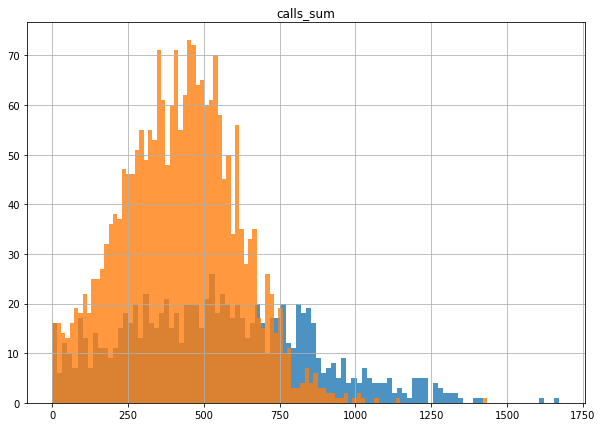

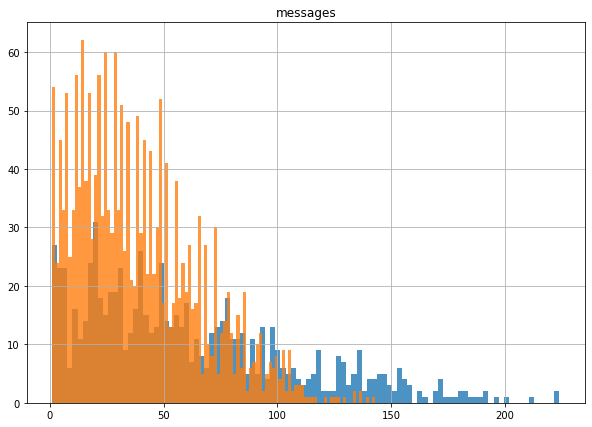

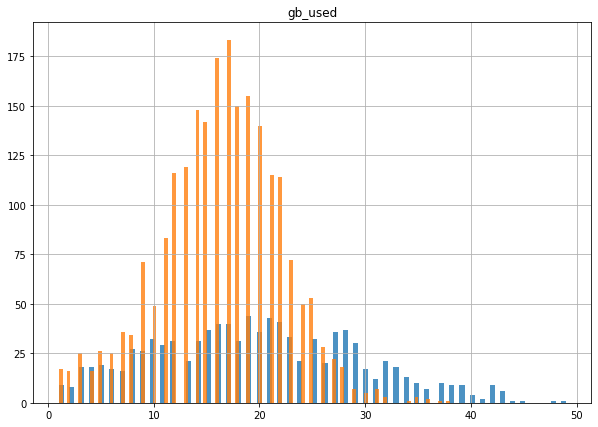

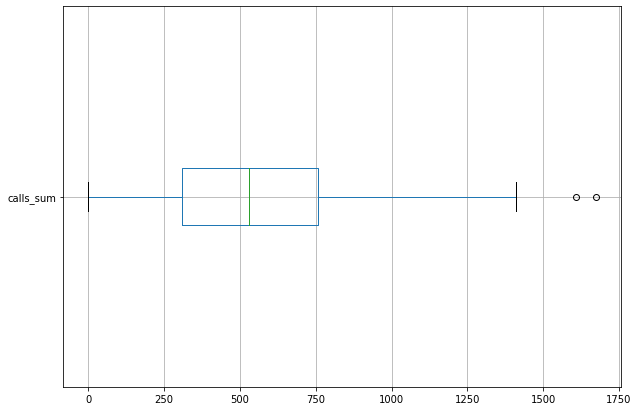

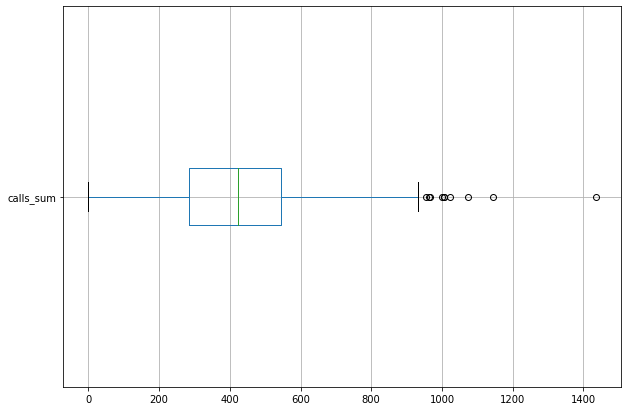

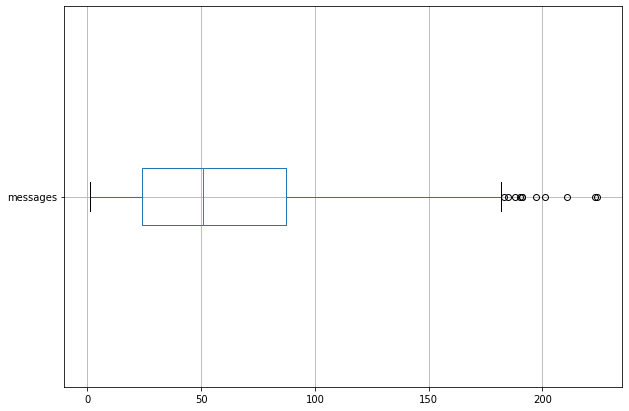

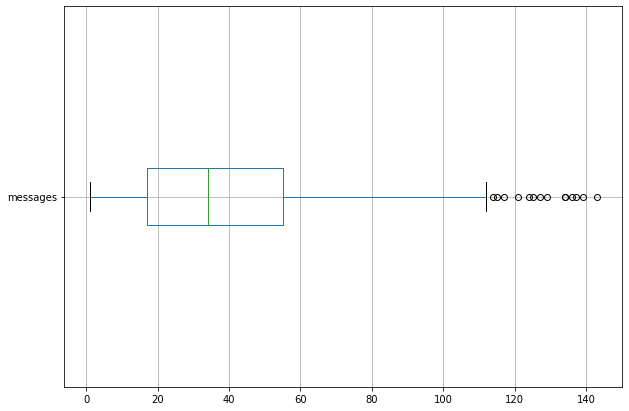

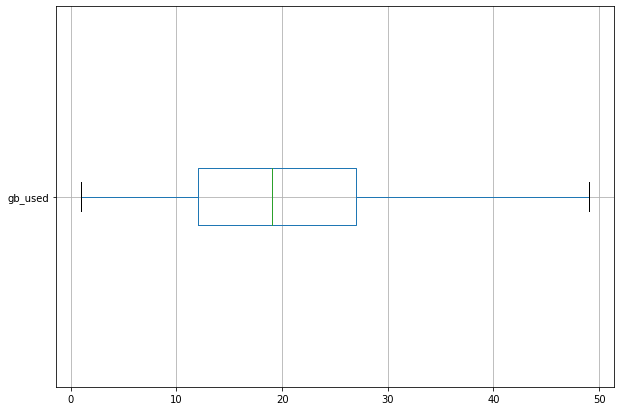

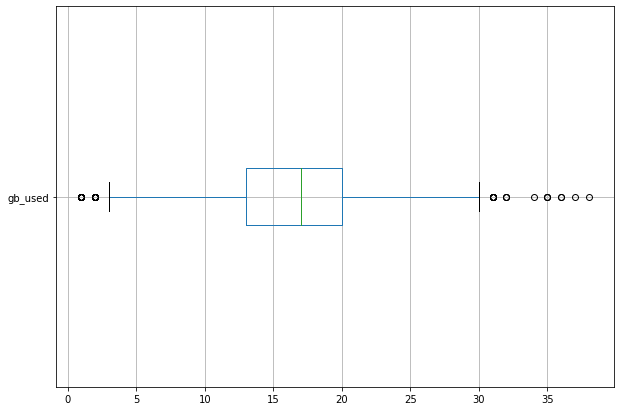

In [24]:
for col in cols:
    plt.figure(figsize=(10,7))
    plt.title(col)
    ultra[col].hist(bins = 100, alpha=0.8)
    smart[col].hist(bins = 100, alpha=0.8)

for col in cols:
    plt.figure(figsize=(10,7))
    ultra.boxplot(column=col, vert=False)
    plt.show()
    plt.figure(figsize=(10,7))
    smart.boxplot(column=col, vert=False)
    plt.show()

## Проверка гипотез

Проверим следующие гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha установим стандартное 0.05.

Проверим первую гипотезу. 

Нулевая гипотеза Н0: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковы"

Альтернативная гипотеза Н1: "Средняя выручка пользователей тарифов «Ультра» и «Смарт» не одинаковы"

Для анализа возьмем массивы ежемесячной выручки с пользователей из столбца monthly_cash.

In [25]:
#sample_1 = user_rev.query('tariff == "ultra"').pivot_table(index='user_id', values='monthly_cash')['monthly_cash']
#sample_2 = user_rev.query('tariff == "smart"').pivot_table(index='user_id', values='monthly_cash')['monthly_cash']
sample_1 = user_rev.query('tariff == "ultra"')['monthly_cash']
sample_2 = user_rev.query('tariff == "smart"')['monthly_cash']

alpha = 0.05
results = st.ttest_ind(sample_1, sample_2)

print('p-значение: {:.10f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.0000000000
Отвергаем нулевую гипотезу


**Вывод**: утверждение, что средняя выручка с пользователей 2х тарифов одинакова, очень маловероятно.
Но это в принипе и логично: один тариф стоит 1950р, другой 550р: уже на старте разница почти в 4 раза. Данную гипотезу логичнее преобразовать, исследовав не выручку, а прибыль с каждого клиента, т.е. очистив выручку от затраченных расходов на обслуживание клиента, тогда выводы были бы намного ценнее.

Тепреь проверим вторую гипотезу.

Нулевая гипотеза Н0: "средняя выручка пользователи из Москвы не отличается от выручки пользователей из других регионов"

Альтернативная гипотеза Н1: "средняя выручка пользователи из Москвы и выручка пользователей из других регионов разные"

Для анализа возьмем массивы ежемесячной выручки с пользователей из столбца monthly_cash и проведем дифференциацию по городу Москва/НеМосква


In [26]:
#sample_1 = user_rev.query('city_type == 1').pivot_table(index='user_id', values='monthly_cash')['monthly_cash']
#sample_2 = user_rev.query('city_type == 0').pivot_table(index='user_id', values='monthly_cash')['monthly_cash']

sample_1 = user_rev.query('city_type == 1')['monthly_cash']
sample_2 = user_rev.query('city_type == 0')['monthly_cash']

alpha = 0.05
results = st.ttest_ind(sample_1, sample_2)

print('p-значение: {:.10f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5440152912
Не получилось отвергнуть нулевую гипотезу


**Вывод**: нельзя опровергнуть тот факт, что средняя выручка пользователи из Москвы не отличается от выручки пользователей из других регионов. То есть, с большой долей вероятности, москвичи тратят на связь больше, чем в других регионах. Это тоже логически подтверждается тем фактом, что уровень жизни значительно выше, чем в большинстве регионов России.

## Общий вывод

Мы проанализировали выборку из 500 пользователей федерального ОСС из разных регионов РФ. Качество исходных данных отличное, артефактов практически нет, предобработка данных минимальна.

Проанализировав пользователей на разных тарифов, мы сделали выводы о том, что в целом лимиты расходов, выделенные оператором на тариф, адекватны и подходят под большинство запросов пользователей, за исключением лимита на интренет-трафик в тарифе Смарт: там в более чем половине случаев пользователи превышали лимит. Это скорее всего обусловлено увеличением потребления контента в интеренете, где постоянно увеличивается качество аудио/видео, а значит и объем затраченного трафика.

Также отмечается тенденция на снижение использования классических смс-сообщений: видимо, интернет-мессенджеры знанимают все больше и больше доли на рынке.